# Odor bout rate and return point histogram Sleep paper

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stats
import scipy.stats as ss
from pylab import *
from scipy.optimize import curve_fit
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy.stats import gaussian_kde
from scipy.stats import sem  # Import sem from scipy
from scipy.stats import ranksums

## Normalized bout histogram to plot return point

Data frame from Matlab

0. bout rate
1. fish number
2. bin number
3. preBout X position
4. preBout time in s


In [139]:
# change directory
bout_rates_ctrl=pd.read_csv(r"E:\Olfaction\Prefernece_index_cadaverine\5mM_cadaverine\bout_rates_control.csv", header=None)
print(bout_rates_ctrl)

              0   1   2        3         4
0      0.049138   3   1  340.149  1227.307
1      0.627746   3   1  340.256  1247.821
2      1.175088   3   1  340.116  1249.779
3      0.440723   3   1  340.375  1251.183
4      3.322259   3   1  340.205  1253.791
...         ...  ..  ..      ...       ...
21425  0.514403   6  46  887.619   550.496
21426  0.051211   8  46  888.788   241.305
21427  1.443001  28  46  887.941   881.466
21428  0.087047  28  46  889.684   882.463
21429  2.016129  35  46  888.213  1161.313

[21430 rows x 5 columns]


In [140]:
# change directory
bout_rates_SD=pd.read_csv(r"E:\Olfaction\Prefernece_index_cadaverine\5mM_cadaverine\bout_rates_SD.csv", header=None)
print(bout_rates_SD)

               0   1   2        3        4
0       0.946970  17   1  342.236  298.401
1       2.380952  17   1  340.146  299.868
2       0.201776  17   1  341.725  417.104
3       1.230012  17   1  341.442  422.386
4       1.239157  17   1  342.308  645.467
...          ...  ..  ..      ...      ...
21078   0.592768  35  45  877.814  453.003
21079   0.017067  37  46  889.375    3.183
21080  15.384615  37  46  889.375   62.054
21081   0.188147  37  46  889.375   62.431
21082   0.045298  37  46  889.375   67.930

[21083 rows x 5 columns]


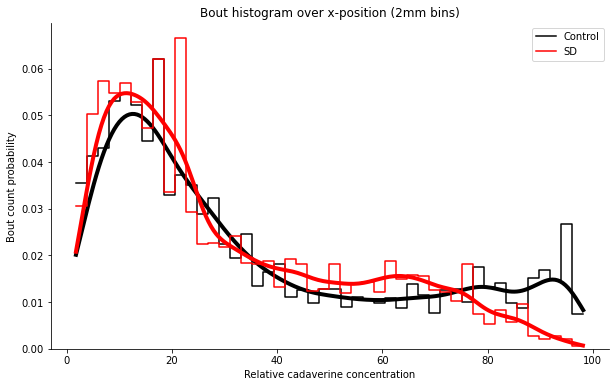

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data1 and data2 are pandas DataFrames
data1 = bout_rates_ctrl
data2 = bout_rates_SD

#convert x values to relative values for cadaverine concentration
preBout_1 = data1[3]
preBout_2=data2[3]
x_min = 330
x_max = 900
normalized_preBout_1 = (preBout_1 - x_min) / (x_max - x_min) * 100
normalized_preBout_2 = (preBout_2 - x_min) / (x_max - x_min) * 100;

# Create a figure
plt.figure(figsize=(10, 6))

# Plot both histograms using histplot ; previously bins: 85, 46bins =2mm per bin
sns.histplot(data=data1, x=normalized_preBout_1, kde=True, bins=46,  color='black',element="step", fill=False, 
             label='Control',stat='probability',
            line_kws = dict(linewidth = 4))
sns.histplot(data=data2, x=normalized_preBout_2, kde=True, bins=46, color='red',element="step", fill=False,
             label='SD',stat='probability',
              line_kws = dict(linewidth = 4))

# Add labels and title
plt.ylabel("Bout count probability")
plt.xlabel("Relative cadaverine concentration")
plt.title("Bout histogram over x-position (2mm bins)")

#plt.ylim(0.0, 0.06)
# Add a legend to distinguish the two distributions
plt.legend()

# Remove the top and right spines for a cleaner look
sns.despine(right=True, bottom=False)

# Save or display the plot
#plt.savefig(r"E:\Olfaction\Preference_index_starved\complete_starvation\Pref_index_starvation_3h\return_point.pdf")
plt.show()


## Bout rates

## New trials!!

bout rate difference calculated by substracting the bout rate 2cm close to odor source from the bout rate far away from odor source.

### Control

#### Bout rates

In [150]:
# Assuming you already loaded the dataframe with appropriate column names:
bout_rates_ctrl.columns = ['bout_rate', 'fish_number', 'bin_number', 'prebout_Xposition', 'prebout_time']

# Create left and right bin subsets
left_df = bout_rates_ctrl[bout_rates_ctrl['bin_number'].between(1, 10)]
right_df = bout_rates_ctrl[bout_rates_ctrl['bin_number'].between(36, 46)]
print(left_df)


# Count total bouts per fish (each row is a bout)
left_bout_counts = left_df.groupby('fish_number').size().rename("total_bouts_left")
print(left_bout_counts)
right_bout_counts = right_df.groupby('fish_number').size().rename("total_bouts_right")

# Calculate bout rate per fish using 1800s experiment time
left_bout_rates = left_bout_counts.to_frame()
right_bout_rates = right_bout_counts.to_frame()

left_bout_rates["bout_rate_per_sec_left"] = left_bout_rates["total_bouts_left"] / 1800
left_bout_rates["bout_rate_per_min_left"] = left_bout_rates["bout_rate_per_sec_left"] * 60
print(left_bout_rates)

right_bout_rates["bout_rate_per_sec_right"] = right_bout_rates["total_bouts_right"] / 1800
right_bout_rates["bout_rate_per_min_right"] = right_bout_rates["bout_rate_per_sec_right"] * 60

# Compute the mean bout rate per fish for left and right
mean_left_bout_rate_min = left_bout_rates["bout_rate_per_min_left"].mean()
SEM_left_bout_rate_min = sem(left_bout_rates["bout_rate_per_min_left"])

mean_right_bout_rate_min = right_bout_rates["bout_rate_per_min_right"].mean()
SEM_right_bout_rate_min = sem(right_bout_rates["bout_rate_per_min_right"])

# Output results
print("Left side mean bout rate:")
print(f" {mean_left_bout_rate_min:.2f} bouts/min +/- {SEM_left_bout_rate_min:.4f}")

print("\nRight side mean bout rate:")
print(f" {mean_right_bout_rate_min:.2f} bouts/min +/- {SEM_right_bout_rate_min:.4f}")

      bout_rate  fish_number  bin_number  prebout_Xposition  prebout_time
0      0.049138            3           1            340.149      1227.307
1      0.627746            3           1            340.256      1247.821
2      1.175088            3           1            340.116      1249.779
3      0.440723            3           1            340.375      1251.183
4      3.322259            3           1            340.205      1253.791
...         ...          ...         ...                ...           ...
9313   3.076923           35          10            451.340      1532.590
9314   1.620746           35          10            442.667      1533.161
9315   8.064516           35          10            446.019      1546.166
9316   3.144654           35          10            447.500      1546.684
9317   0.365764           35          10            445.241      1595.362

[9318 rows x 5 columns]
fish_number
1     355
2     236
3     165
4     102
5     410
6     218
7     522
8    

In [151]:
# check for correctness
left_df.loc[left_df['fish_number'] == 1]

,bout_rate,fish_number,bin_number,prebout_Xposition,prebout_time
924,0.862813,1,3,366.927,52.233
925,1.703578,1,3,365.310,53.751
926,6.097561,1,3,364.878,54.597
927,17.241379,1,3,361.873,55.192
928,2.325581,1,3,362.240,55.890
...,...,...,...,...,...
8652,2.450980,1,10,451.227,954.989
8653,1.919386,1,10,443.386,960.720
8654,1.492537,1,10,445.442,961.541
8655,7.751938,1,10,445.789,987.726


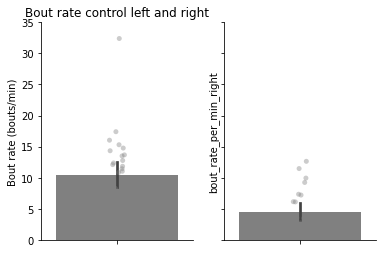

In [154]:
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,y=left_bout_rates['bout_rate_per_min_left'], color = "grey", orient="v")
ax = sns.stripplot(ax=ax1,y="bout_rate_per_min_left", data=left_bout_rates, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, y=right_bout_rates['bout_rate_per_min_right'], color = "grey", orient="v")
ax = sns.stripplot(ax=ax2,y="bout_rate_per_min_right", data=right_bout_rates, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax1.set_title("Bout rate control left and right")
ax.set_ylim(0, 35)
ax1.set_ylabel("Bout rate (bouts/min)")
sns.despine(right=True, bottom=False)
fig.savefig(r"E:\Olfaction\Preference_index_cortisol\100ng_cortisol_15min\bout_rate_left_right_control.pdf")

#### Bout rate difference


In [155]:
# Merge left and right bout rates for each fish
bout_rate_df_ctrl = pd.merge(left_bout_rates, right_bout_rates, on='fish_number')
print(bout_rate_df_ctrl)

# Calculate the difference: bout rate right - bout rate left
bout_rate_df_ctrl['bout_rate_difference'] = bout_rate_df_ctrl['bout_rate_per_min_right'] - bout_rate_df_ctrl['bout_rate_per_min_left']
#print(bout_rate_df_ctrl)

# Calculate the mean bout rate difference across all fish
mean_bout_rate_difference_ctrl = bout_rate_df_ctrl['bout_rate_difference'].mean()
sem_bout_rate_difference_ctrl = sem(bout_rate_df_ctrl['bout_rate_difference'])

# print results
#print("Mean bout rate difference Control")
print(f" {mean_bout_rate_difference_ctrl:.4f} bouts/min +/- {sem_bout_rate_difference_ctrl:.4f}")

             total_bouts_left  bout_rate_per_sec_left  bout_rate_per_min_left  \
fish_number                                                                     
1                         355                0.197222               11.833333   
2                         236                0.131111                7.866667   
4                         102                0.056667                3.400000   
6                         218                0.121111                7.266667   
8                         371                0.206111               12.366667   
10                        343                0.190556               11.433333   
11                        325                0.180556               10.833333   
12                        443                0.246111               14.766667   
13                        972                0.540000               32.400000   
17                        137                0.076111                4.566667   
18                        15

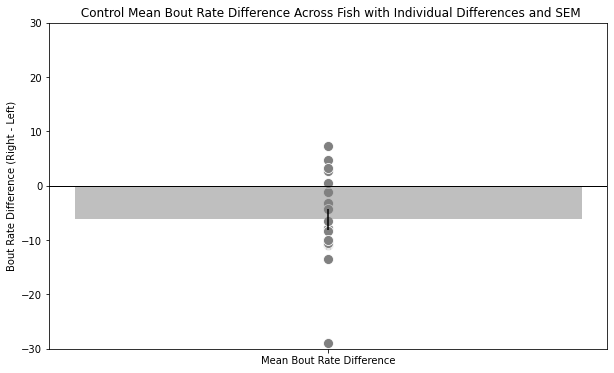

In [156]:
# Plotting
plt.figure(figsize=(10, 6))

# Bar plot: Mean bout rate difference across all fish with error bar for SEM
ax=sns.barplot(x=['Mean Bout Rate Difference'], y=[mean_bout_rate_difference_ctrl], color='grey', yerr=sem_bout_rate_difference_ctrl, alpha=0.5)

# Scatter plot overlay: Individual bout rate differences per fish
ax=sns.scatterplot(x=['Mean Bout Rate Difference'] * len(bout_rate_df_ctrl), y=bout_rate_df_ctrl['bout_rate_difference'], color='grey', s=100)

# Labels and title
plt.ylabel("Bout Rate Difference (Right - Left)")
plt.title(" Control Mean Bout Rate Difference Across Fish with Individual Differences and SEM")

plt.ylim(-30,30)
plt.axhline(y=0, color='black', linewidth=1, linestyle='-')  # Dashed line at y=0

#plt.savefig(r"E:\Olfaction\Preference_index_starved\complete_starvation\Pref_index_starvation_3h\boutrateDiff_ctrl.pdf")
plt.show()

### Treatment

In [157]:
# Assuming you already loaded the dataframe with appropriate column names:
bout_rates_SD.columns = ['bout_rate', 'fish_number', 'bin_number', 'prebout_Xposition', 'prebout_time']

# Create left and right bin subsets
left_df = bout_rates_SD[bout_rates_ctrl['bin_number'].between(1, 10)]
right_df = bout_rates_SD[bout_rates_ctrl['bin_number'].between(36, 46)]
print(left_df)


# Count total bouts per fish (each row is a bout)
left_bout_counts = left_df.groupby('fish_number').size().rename("total_bouts_left")
print(left_bout_counts)
right_bout_counts = right_df.groupby('fish_number').size().rename("total_bouts_right")

# Calculate bout rate per fish using 1800s experiment time
left_bout_rates = left_bout_counts.to_frame()
right_bout_rates = right_bout_counts.to_frame()

left_bout_rates["bout_rate_per_sec_left"] = left_bout_rates["total_bouts_left"] / 1800
left_bout_rates["bout_rate_per_min_left"] = left_bout_rates["bout_rate_per_sec_left"] * 60
print(left_bout_rates)

right_bout_rates["bout_rate_per_sec_right"] = right_bout_rates["total_bouts_right"] / 1800
right_bout_rates["bout_rate_per_min_right"] = right_bout_rates["bout_rate_per_sec_right"] * 60

# Compute the mean bout rate per fish for left and right
mean_left_bout_rate_min = left_bout_rates["bout_rate_per_min_left"].mean()
SEM_left_bout_rate_min = sem(left_bout_rates["bout_rate_per_min_left"])

mean_right_bout_rate_min = right_bout_rates["bout_rate_per_min_right"].mean()
SEM_right_bout_rate_min = sem(right_bout_rates["bout_rate_per_min_right"])

# Output results
print("Left side mean bout rate:")
print(f" {mean_left_bout_rate_min:.2f} bouts/min +/- {SEM_left_bout_rate_min:.4f}")

print("\nRight side mean bout rate:")
print(f" {mean_right_bout_rate_min:.2f} bouts/min +/- {SEM_right_bout_rate_min:.4f}")

      bout_rate  fish_number  bin_number  prebout_Xposition  prebout_time
0      0.946970           17           1            342.236       298.401
1      2.380952           17           1            340.146       299.868
2      0.201776           17           1            341.725       417.104
3      1.230012           17           1            341.442       422.386
4      1.239157           17           1            342.308       645.467
...         ...          ...         ...                ...           ...
9313   1.215067           14          10            445.800       179.123
9314   2.881844           14          10            452.600       180.301
9315   0.972763           15          10            451.250       288.267
9316   2.178649           16          10            444.121        50.514
9317   4.366812           16          10            447.346        51.270

[9318 rows x 5 columns]
fish_number
1     433
2     182
3     329
4     367
5     275
6     171
7     336
8    

<ipython-input-157-8adea3168e5c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  left_df = bout_rates_SD[bout_rates_ctrl['bin_number'].between(1, 10)]
<ipython-input-157-8adea3168e5c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  right_df = bout_rates_SD[bout_rates_ctrl['bin_number'].between(36, 46)]


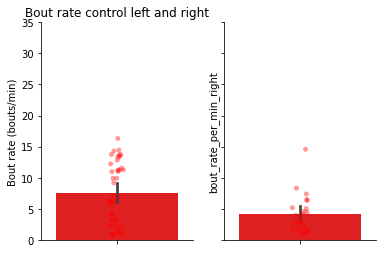

In [159]:
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,y=left_bout_rates['bout_rate_per_min_left'], color = "red", orient="v")
ax = sns.stripplot(ax=ax1,y="bout_rate_per_min_left", data=left_bout_rates, dodge=True, color="red", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, y=right_bout_rates['bout_rate_per_min_right'], color = "red", orient="v")
ax = sns.stripplot(ax=ax2,y="bout_rate_per_min_right", data=right_bout_rates, dodge=True, color="red", alpha = 0.4,jitter = 0.05)

ax1.set_title("Bout rate control left and right")
ax.set_ylim(0, 35)
ax1.set_ylabel("Bout rate (bouts/min)")
sns.despine(right=True, bottom=False)
#fig.savefig(r"E:\Olfaction\Preference_index_cortisol\100ng_cortisol_15min\bout_rate_left_right_control.pdf")

In [160]:
p=ranksums(bout_rate_df_ctrl['bout_rate_difference'], bout_rate_df_SD['bout_rate_difference'])
print(f"control vs treatment: statistic={p.statistic:.6f}, p-value={p.pvalue:.10f}")

control vs treatment: statistic=-1.115088, p-value=0.2648127508
